# Entregável 1 - visão computacional

In [9]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import pylab 
import scipy.stats as stats
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.11 


# Equalização de histograma

In [10]:
rintin = cv2.imread("RinTinTin.jpg")

In [11]:
rintin.shape

(240L, 320L, 3L)

In [12]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [13]:
rintin_gray.shape

(240L, 320L)

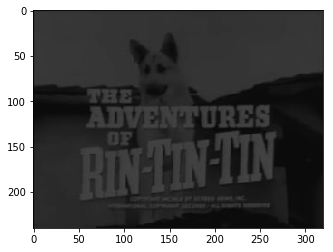

In [14]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

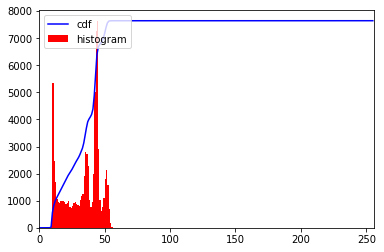

In [15]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

Não. O histograma utiliza apenas uma fração da resolucao que ele poderia comportar, significando que houve uma perda grande de informacao e que houve uma reducao da resolucao do histograma. A informacao começa no valor 8 e se extende ate o valor 58, portanto, a informacao é concentrada em valores baixos - nao aproveitando a extencao total de valores disponiveis: 0-255 - e tambem foi deslocada no eixo 'x' para a direita - nao utilizando o extremo mais baixo de valores disponiveis para as faixas de cores, preto e branco, outro mal uso do histograma. 

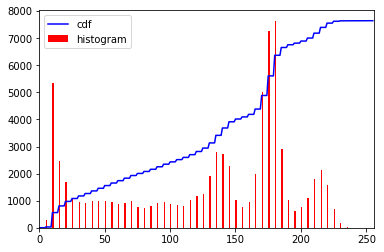

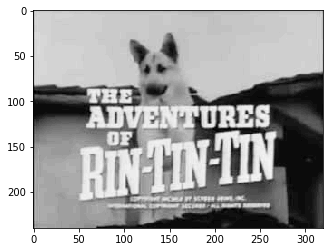

In [16]:
# Deslocando a informação para a esquerda, assim aproveitando os valores mais baixos disponiveis
# Subtraindo 8 (valor minimo na imagem 'rintin_gray') de todos os valores na imagem 'rintin_gray'
rintin_gray = np.subtract(rintin_gray,min(np.concatenate(rintin_gray)))

# Esticando o grafico no eixo 'x', assim aproveitando toda a extenção de valores disponiveis (0-255)
# Multiplicando pela razao de 255 pelo valor maximo contido na imagem rintin_gray - assim o valor maximo torna-se 255
rintin_gray = np.multiply(rintin_gray,(255/(max(np.concatenate(rintin_gray)))))

# Plotando o histograma usando o mesmo codigo contido na celula anterior, porem agora a imagem rintin_gray foi tratada
# Para otimizar o uso do histograma
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Mostrar a imagem otimizada e tratada para usar da melhor forma as faixas de cores
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


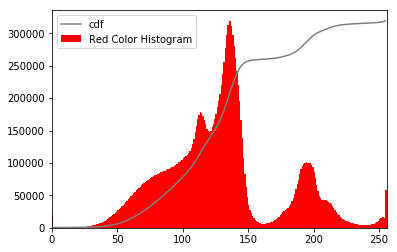

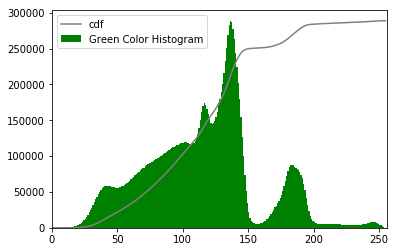

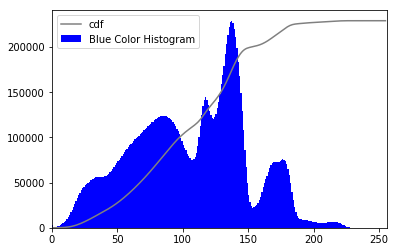

In [10]:
# Salvando a imagem em uma variavel
new_img = cv2.imread("hall_box_battery1.jpg")

# Transformando a imagem em RGB em vez de BGR
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)

# Dicionario para ser usado no for quando fazendo os histogramas para os canais RGB
dic = {0 : "Red",1 : "Green",2 : "Blue"}

# Para cada um dos canais disponiveis
for x in range(0,3):
    
    # Plotar o histograma usando o mesmo codigo que estava disponivel por que a faixa de cores varia entre os mesmos valores
    # (0 - 255)
    hist,bins = np.histogram(new_img[:,:,x].flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.plot(cdf_normalized, color = 'gray')
    plt.hist(new_img[:,:,x].flatten(),256,[0,256], color = dic[x])
    plt.xlim([0,256])
    plt.legend(('cdf',dic[x] + ' Color Histogram'), loc = 'upper left')
    plt.show()

Pelo histograma em si eu nao sou capaz de identificar com certeza a caixa vermelha ou a bateria azul. Os histogramas, para mim, sao muito semelhantes e suas diferencas nao justificam alegar com certeza a existencia da caixa vermelha ou da bateria azul na imagem.

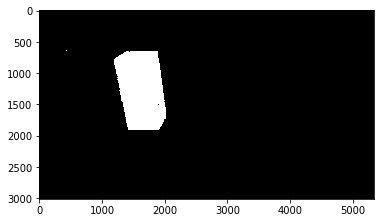

In [6]:
# Metodo que chamei de 'Nutella' por ser chato e nao ser o que voce quer ver, usando 'cv2.inRange()'
# Para ver o metodo 'Raiz', vá para a proxima celula

# Salvando a imagem em uma variavel
new_img = cv2.imread("hall_box_battery1.jpg")

# Mudando o formato dos canais da imagem de BGR para RGB
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)

# Definindo valores minimos de Red, Green e Blue
lower = np.array([160,0,0])
# Definindo valores minimos de Red, Green e Blue
upper = np.array([255,160,120])

# Usando a funcao 'inRange' para acender os pixeis que estao dentro dos valores minimos e maximos de Red e Green e Blue
box = cv2.inRange(new_img, lower, upper)

# Mostrar a imagem criada
plt.imshow(box, cmap="Greys_r")

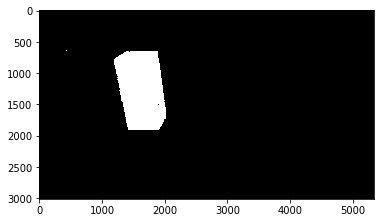

In [18]:
# Metodo que chamei de 'Raiz' por achar que fosse ser muito mais legal, no fim das contas ele só replica a funcao 'inRange'

# Salvando a imagem em uma variavel
new_img = cv2.imread("hall_box_battery1.jpg")

# Declarando um argumento que resume quais pixeis devem ser apagados com valores tirados da função 'inRange'
# Como eu nao mudei os canais da imagem, o index 0 equivale a Blue, o index 1 equivale a Green e o index 2 equivale a Red
statement = (new_img[:,:,2] < 160)|(new_img[:,:,1] > 160)|(new_img[:,:,0] > 120)

# Usando o slice do numpy para selecionar todos os pixeis que satisfaçam o 'statement' declarado e zerar todos os canais
new_img[statement] = 0
# Usando o slice do numpy para selecionar todos os pixeis que não satisfaçam o 'statement' declarado e 'max-out' os canais
new_img[~statement] = 255

# Mostrar a imagem modificada
plt.imshow(new_img)